## **Import Dataset to Analysis**



In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Once we log in with the appropriate account (the one you have *BigQuery* access to), we will connect our data in the ***BigQuery Project*** to this challenge(`'technical-challenge-autoforce'`).

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='technical-challenge-autoforce')

We can then use SQL to query your *BigQuery* data and save the output of the query as a dataframe with the following code:

In [ ]:
#Replace 'dataset_name' with your actual dataset name
#Replace 'table_name' with the name of the table you want to query

sql_query = ('''SELECT *
                FROM dataset_cs_ecommerce.all_events_2019_to_2020
                ''')

df = client.query(sql_query).to_dataframe()

## **Load Libraries**

Load the main libraries in ***Python*** to carry out exploratory data analysis on this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import plotly.express as px
import seaborn as sns



---



## **Part. 1 - Technical Challenge Analysis** - [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop) **Dataset**

This dataset includes behavioral data from a **mid-sized cosmetics online store** from **Oct. 2019 to Jan. 2020**. Each entry in this dataset represents an *event* related to *products* and *users*. The events consist of different types such as `views`, items added to `cart`, items `removed from cart`, and `purchases`.

<a id="1-data-overview"></a>
## **1. Data Overview**

To better understand the data and **provide meaningful insights**, I'll start by loading the dataset and performing an **initial analysis**. This will include examining the structure of the data, the types of columns available, and some basic statistics. Let's begin by loading and exploring the data.

In [ ]:
# Show a general view of data
# Look at the first 10 rows.
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-19 11:47:38+00:00,view,5914130,1487580008112194531,None,dewal,2.98,617318028,ab7b6c11-2de9-4784-8237-643844a290e6
1,2020-01-26 10:27:30+00:00,cart,5913656,1487580008112194531,None,dewal,7.78,549220570,d1e51c76-362e-41d4-84af-5ccb4e731d1a
2,2019-12-11 04:15:21+00:00,remove_from_cart,5862561,1487580008145748965,None,roubloff,1.78,509021442,fa2616f0-33f1-43d7-9215-70427e9c6909
3,2020-01-13 23:31:20+00:00,view,5862570,1487580008145748965,None,roubloff,6.03,475822604,067d1af1-f0f8-4554-8f68-be1708345637
4,2020-02-14 12:03:41+00:00,remove_from_cart,5862573,1487580008145748965,None,roubloff,6.35,599714047,29b7721a-e16e-48a7-bade-8a7148a2b717
5,2019-10-29 00:38:44+00:00,view,5587654,1487580008145748965,None,roubloff,3.49,472017180,b1d85c29-c248-4460-b7a6-936e67dfc195
6,2020-01-05 21:08:01+00:00,view,5862569,1487580008187692007,None,roubloff,4.76,470877727,60363b7b-187a-4884-a458-f9efc2333d7d
7,2019-11-22 12:23:33+00:00,view,5777452,1487580008246412266,None,lakme,7.00,520273384,0e2d5075-0cb3-40d4-9b19-76f6c6f94f46
8,2020-02-08 07:45:30+00:00,view,5862228,1487580008246412266,None,matrix,19.11,230862012,5b9bcf07-5c80-4f98-84dd-cad0883e0477
9,2019-10-16 08:48:10+00:00,view,5766601,1487580008246412266,None,kaaral,26.54,300740435,a1b25582-6ca0-4375-b270-13c9ce96e085


The datasets provides the same following columns:

* `event_time`: Timestamp of the event.
* `event_type`: Type of event (e.g., 'cart', 'view', 'remove_from_cart', 'purchase').
* `product_id`: Identifier for the product.
* `category_id`: Identifier for the product category.
* `category_code`: Category of the product (some entries are missing).
* `brand`: Brand of the product (some entries are missing).
* `price`: Price of the product.
* `user_id`: Identifier for the user.
* `user_session`: Identifier for the user session.

In [ ]:
# Information about the DataFrame (data types, number of non-null values, etc.):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     Int64              
 3   category_id    Int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        Int64              
 8   user_session   object             
dtypes: Int64(3), datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 1.4+ GB


In [ ]:
# Summarize the dataset
df.describe()

,product_id,category_id,price,user_id
count,20692840.0,20692840.0,2.069284e+07,20692840.0
mean,5484296.739535,-30478489757.482208,8.534735e+00,521552663.55997
std,1305715.731109,169103784917514976.0,1.938142e+01,87443121.502008
min,3752.0,1487580004807082752.0,-7.937000e+01,465496.0
25%,5724650.0,1487580005754995456.0,2.060000e+00,481830633.25
50%,5810720.0,1487580008263189504.0,4.050000e+00,553129688.0
75%,5857864.0,1487580013506068736.0,7.060000e+00,578857321.0
max,5932595.0,2242903426784559104.0,3.277800e+02,622090237.0


To get a better understanding of the data, I will perform the following analyses:

* **Basic statistics** (*count, mean, etc*.) for numerical columns like `price`.
* **Distribution** of `event_type` to see the frequency of each event.
* Check for **missing values** in important columns like `category_code`, `brand`, and `event_type`.
* **Summary of unique values** in columns like `product_id`, `user_id`, and user_session.

In [ ]:
# Simple count
total_stats = df.count()
print(total_stats)

event_time       20692840
event_type       20692840
product_id       20692840
category_id      20692840
category_code      353594
brand            11935723
price            20692840
user_id          20692840
user_session     20688242
dtype: int64


In [ ]:
# Count null values
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [ ]:
# DataFrame dimensions (number of rows and columns):
df.shape

(20692840, 9)

In [ ]:
# Summarizing views in a single cell

# Basic statistics for numerical columns
numerical_stats = df.describe()

# Distribution of event types
event_type_distribution = df['event_type'].value_counts()

# Checking for missing values in important columns
missing_values = df.isnull().sum()

# Summary of unique values in key columns
unique_product_ids = df['product_id'].nunique()
unique_user_ids = df['user_id'].nunique()
unique_user_sessions = df['user_session'].nunique()

numerical_stats, event_type_distribution, missing_values, unique_product_ids, unique_user_ids, unique_user_sessions

(           product_id            category_id         price          user_id
 count      20692840.0             20692840.0  2.069284e+07       20692840.0
 mean   5484296.739535    -30478489757.482208  8.534735e+00  521552663.55997
 std    1305715.731109   169103784917515008.0  1.938142e+01  87443121.502008
 min            3752.0  1487580004807082752.0 -7.937000e+01         465496.0
 25%         5724650.0  1487580005754995456.0  2.060000e+00     481830633.25
 50%         5810720.0  1487580008263189504.0  4.050000e+00      553129688.0
 75%         5857864.0  1487580013506068736.0  7.060000e+00      578857321.0
 max         5932595.0  2242903426784559104.0  3.277800e+02      622090237.0,
 view                9657821
 cart                5768333
 remove_from_cart    3979679
 purchase            1287007
 Name: event_type, dtype: int64,
 event_time              0
 event_type              0
 product_id              0
 category_id             0
 category_code    20339246
 brand             875

In [ ]:
df['event_type'].value_counts()

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

In [ ]:
# Percentage of view (view + remove_from_cart), purchase, cart of the total event_type

total_events = df['event_type'].count()
views_and_removals = df['event_type'].isin(['view', 'remove_from_cart']).sum()
purchases = df['event_type'].isin(['purchase']).sum()
carts = df['event_type'].isin(['cart']).sum()

print('Percentage of views (view + remove_from_cart):', round(views_and_removals / total_events * 100, 2), '%')
print('Percentage of carts:', round(carts / total_events * 100, 2), '%')
print('Percentage of purchases:', round(purchases / total_events * 100, 2), '%')

Percentage of views (view + remove_from_cart): 65.9 %
Percentage of carts: 27.88 %
Percentage of purchases: 6.22 %


In [ ]:
# Donut chart of the total event_type

event_names = df['event_type'].unique()
event_values = df['event_type'].value_counts()
fig = px.pie(names=event_names, values=event_values, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of total event_type", "x":0.50}})
fig.show()


In [ ]:
# Count the unique number of users, products, categories, and brands
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
num_categories = df['category_id'].nunique()
num_taxonomies = df['category_code'].nunique()
num_brands = df['brand'].nunique()

print('Total number of users: ',num_users)
print('Total number of products: ', num_products)
print('Total number of categories: ', num_categories)
print('Total number of taxonomies: ', num_taxonomies)
print('Total number of brands: ', num_brands)

Total number of users:  1639358
Total number of products:  54571
Total number of categories:  525
Total number of taxonomies:  12
Total number of brands:  273


We will analyze over a dataset of **20692840 rows** with **9 columns** containing basic information of user (`user_id, user_session`), product (`product_id, category_id, category_code, brand, price`) and event (`event_time, event_type`). Additionally, two columns containing information of products. `category_code` and brand have missing values. Here are short summarize of those attributes:

| **Property**     | **Description**                                             | **Type**  | **Note**
|------------------|-------------------------------------------------------------|-----------|-----------------------------------
| **event_time**   | Time when event happened at (in UTC).                       | *time*    | **20692840** total values
| **event_type**   | Four kinds of event: view, cart, purchase, remove from cart | *string*  | **65.92%** view, **6.22%** purchase, **27.86** cart
| **product_id**   | ID of a product.                                            | *integer* | **54571** distinct products
| **category_id**  | Product's category ID.                                      | *integer* | **525** category IDs
| **category_code**| Product's category taxonomy, code name (can be missing).    | *string*  | **12** different taxonomies
| **brand**        | Downcased string of brand name (can be missing).            | *string*  | **273** different brands
| **price**        | Float price of a product. Present.                          | *float*   | min: **-7.937**, max: **3.278**, mean: **8.534**
| **user_id**      | Permanent user ID.                                          | *integer* | **1639358** total users
| **user_session** | Temporary user's session ID. Changed after pauses.          | *string*  |



What we don't have (that may support the analysis for further recommendation system) are: **user information** (age, gender, country, etc.), **user feedback** (in content-filtering, understanding user sastification toward a product is very important to build a good recommender), online store website structure (the website's navigation and category layout influence how customers browse and find products, since we have category_code support the fact that its product hierarchy that puts products into categories, and tags are used to group products into each category).



So, on this ***eCommerce Events History in Cosmetics Shop*** dataset there are 2 types of category representations: `category_id` and `category_code`, both have its benefits:

* **Category ID:** The "`category_id`" is a numerical identifier assigned to each product category. It's a unique numerical code used to distinguish different categories from each other. It's often used for database indexing and efficient querying because numerical codes are faster to process than text-based codes.

* **Category Code (Product Taxonomy):** The `category_code` is a textual representation of a product's category within a taxonomy or hierarchy. It's a more human-friendly way to understand the product's category. It follows a hierarchical structure where the different levels of the category hierarchy are separated by periods (for examples: "appliances.environment.water_heater" or "furniture.living_room.sofa").

Often, the `category_code` is obtained from the hierarchical arrangement of the taxonomy, while the `category_id` is utilized for internal database operations and indexing. However, information regarding null `category_code` is not available in the data set, so for analysis purposes this column will no longer be used.

* Drop the `category_code` column since **20339246 of the data is missing** and it won't be useful in the analysis.

In [ ]:
# Remove the 'category_code' column from the dataframe
df = df.drop(columns=['category_code'])
# Display the first few rows of the modified dataframe to confirm the change
df.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2020-02-19 11:47:38+00:00,view,5914130,1487580008112194531,dewal,2.98,617318028,ab7b6c11-2de9-4784-8237-643844a290e6
1,2020-01-26 10:27:30+00:00,cart,5913656,1487580008112194531,dewal,7.78,549220570,d1e51c76-362e-41d4-84af-5ccb4e731d1a
2,2019-12-11 04:15:21+00:00,remove_from_cart,5862561,1487580008145748965,roubloff,1.78,509021442,fa2616f0-33f1-43d7-9215-70427e9c6909
3,2020-01-13 23:31:20+00:00,view,5862570,1487580008145748965,roubloff,6.03,475822604,067d1af1-f0f8-4554-8f68-be1708345637
4,2020-02-14 12:03:41+00:00,remove_from_cart,5862573,1487580008145748965,roubloff,6.35,599714047,29b7721a-e16e-48a7-bade-8a7148a2b717


Also, notice that the `user_session` **column has 4598** `null` values. The `user_session` should be used as primary key in the database and should not have `null` values.

Therefore, the `category_code` had to be removed since the `null` values of `user_session` were also filled with this profile, which needed to be removed as well.


In [ ]:
# Remove rows where 'user_session' or 'user_id' has missing values
cleaned_data = df.dropna(subset=['user_session', 'user_id'])

# Display the shape of the dataset before and after removal of missing values
original_shape = df.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape

((20692840, 8), (20688242, 8))

In [ ]:
# New Count null values
cleaned_data.isnull().sum()
df = cleaned_data

In [ ]:
# Count null values
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           8755488
price                 0
user_id               0
user_session          0
dtype: int64

To an **Exploratory Data Analysis (EDA)** is a critical step in understanding your data, *identifying patterns*, *spotting anomalies*, and *testing hypotheses*. Let's delve into the importance of analyzing specific aspects such as products with zero prices, the relationship between prices and brands, and the patterns in event times:

### **First Observations to Next Steps to Market Analysis**

1. **Products with Zero Prices**: Analyzing products with zero prices helps identify potential data quality issues or special cases like promotions or giveaways. This is crucial for accurate revenue projection and understanding marketing strategies. Zero-priced items could skew average pricing metrics and need careful handling in any analysis.

2. **Prices and Brands**: This analysis focuses on understanding the relationship between product prices and their associated brands. It provides insights into brand positioning (premium vs. budget), consumer behavior (which price ranges are popular for certain brands), and competitive market dynamics. It's also key for assessing pricing strategies and understanding price elasticity across different brands

3. **Events of Time**: Analyzing temporal patterns in customer events (like purchases or views) helps identify trends, seasonality, and customer engagement times. This is vital for planning marketing initiatives, managing inventory, and predicting future demand. It also assists in anomaly detection, revealing unusual activity that might indicate system issues or market shifts.

Each area provides significant ***insights*** into business operations and customer behavior, guiding strategic decision-making.

#### **Products with Zero-prices**

In [ ]:
# Filter products with 0-price and less
zero_price = df[df['price'] <= 0]
zero_price.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
3502,2020-02-06 21:00:59+00:00,cart,5814734,1783999068909863670,None,0.0,345824591,35eda300-9c23-4d87-96a4-1da53bd142f7
3755,2020-01-29 13:09:54+00:00,view,5923293,1487580013145358517,None,0.0,493481951,69878e7a-72f3-42f6-8fbc-4815cfa5e5c0
3875,2020-01-17 09:03:13+00:00,cart,5920432,1487580011652186237,None,0.0,352394658,dee05e29-f331-48dc-b1b3-547985fc2aa4
4195,2020-02-01 07:35:38+00:00,remove_from_cart,5838756,1487580006962955182,None,0.0,403905011,fc7282ef-2bba-f8b0-90fa-2ea6abd747af
4205,2019-12-23 16:04:41+00:00,view,5899868,1487580013170524342,None,0.0,563047849,e26b063a-473a-4301-ac09-bd73d276cae5


It seems like those 0-price product has **no brand** and some others with less than zero, almost as if they had a **discount**?

In [ ]:
# Calculate the total number of unique products with zero price
zeroprice_total = zero_price['product_id'].nunique()
print('Total 0-price products: ', zeroprice_total)

# Calculate the percentage of zero-price products that have no brand
# First, filter zero_price DataFrame for rows where brand is missing (NaN)
# Then, count the unique product IDs in this subset and calculate the percentage
nobrand_zeroprice_percentage = 100 * zero_price[zero_price['brand'].isna()]['product_id'].nunique() / zeroprice_total
print('Percentage of 0-price products has no brand: {0:.2f}%'.format(nobrand_zeroprice_percentage))

# Calculate the percentage of zero-price products in relation to all products
# Count the unique product IDs in zero_price and divide by the count of unique product IDs in df
zeroprice_percentage = 100 * zero_price['product_id'].nunique() / df['product_id'].nunique()
print('Percentage of 0-price products per all products: {0:.2f}%'.format(zeroprice_percentage))

# Calculate the percentage of products without a brand in relation to all products
# Filter df for rows where brand is missing, count unique product IDs, and calculate the percentage
nobrand_percentage = 100 * df[df['brand'].isna()]['product_id'].nunique() / df['product_id'].nunique()
print('Percentage of products has no brand per all products: {0:.2f}%'.format(nobrand_percentage))

Total 0-price products:  21999
Percentage of 0-price products has no brand: 99.95%
Percentage of 0-price products per all products: 40.31%
Percentage of products has no brand per all products: 65.47%


With this, we observe that all the **zero-price** products have **no brand**, accounting for **40.31%** of total products. However, it's important to note that **not all no-brand** products are priced at 0; the number of products with no brand accounts for **65.47%** of the total. Additionally, 0-price products may be attributed to the following factors:

1. **Missing Information**: The unknown brand and zero price might indicate that these products are placeholders or items for which complete information hasn't been entered into the dataset.

2. **Free or Promotional Items**: A zero price might intentionally indicate that the product is not being sold but rather offered as a promotion.

3. **Special Cases**: Some products might genuinely have a zero price due to unique circumstances. For example, a software product with a freemium model might have a free version with a zero price. Or products that have not shown prices can be considered as **placeholder prices**.

In [ ]:
# Category id of those product?
zeroprice_mainCat = zero_price.groupby('category_id')['product_id'].nunique()
zeroprice_mainCat

category_id
1487580004807082827      1
1487580004832248652    126
1487580004857414477    225
1487580004882580302    127
1487580004916134735    391
                      ... 
2196456817758831535      3
2235524494015856752      2
2235524499216793855     46
2235524499636224267      4
2242903426784559183      6
Name: product_id, Length: 404, dtype: int64

<Axes: xlabel='category_id'>

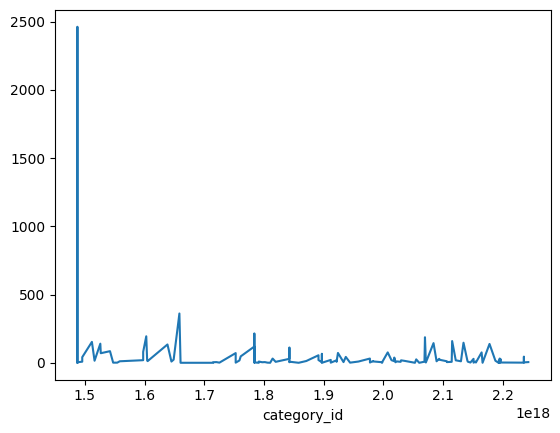

In [ ]:
# See the distribution
zeroprice_mainCat.plot()

We can observe that zero-price products are present across all product ranges.
It is also important to analyze the events associated with these zero-price products:

In [ ]:
# Donut chart of event_type
zeroprice_event_names = zero_price['event_type'].unique()
zeroprice_event_values = zero_price['event_type'].value_counts()
fig = px.pie(names=zeroprice_event_names, values=zeroprice_event_values, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of zero-price product events", "x":0.50}})
fig.show()

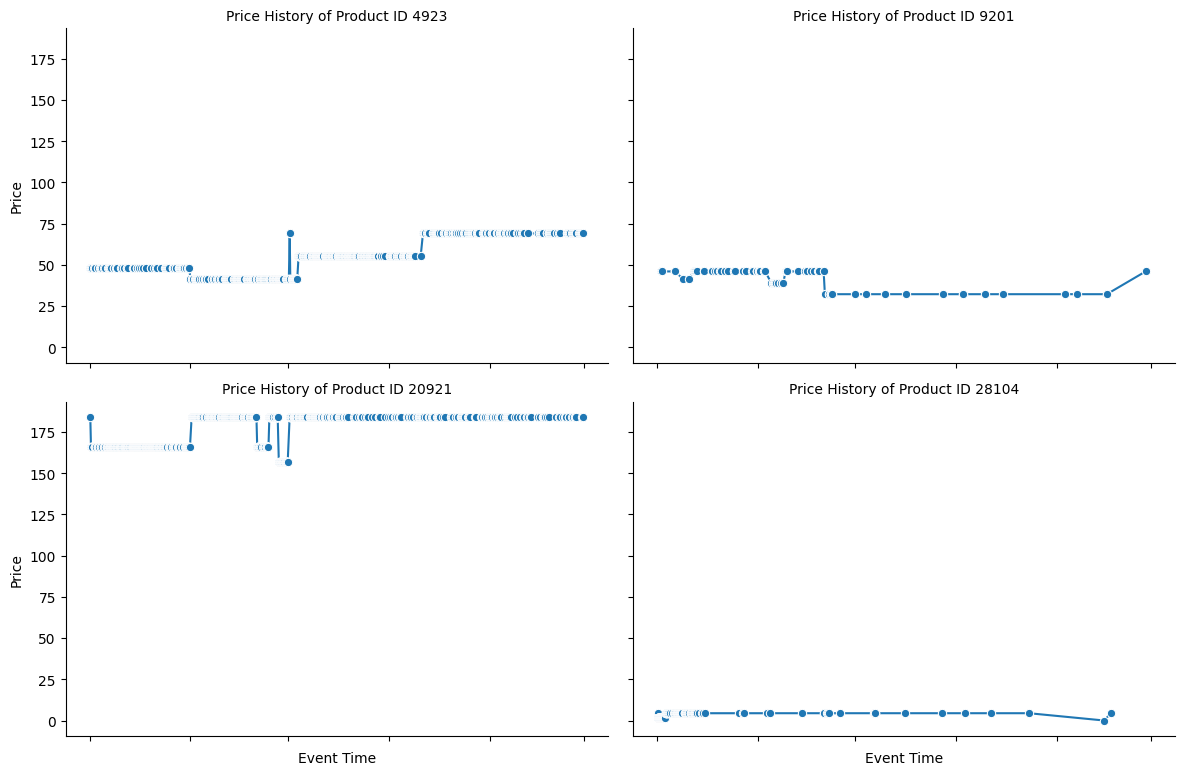

In [ ]:
# Definir IDs dos produtos
zeroprice_id = [4923, 9201, 20921, 28104]

# Converter 'event_time' para formato datetime e filtrar para outubro
df['event_time'] = pd.to_datetime(df['event_time'])

# Filtrar df_october para incluir apenas os IDs de produto especificados
filtered_data = df[df['product_id'].isin(zeroprice_id)]

# Criar uma FacetGrid para plotar a história de preços de cada produto
g = sns.FacetGrid(filtered_data, col="product_id", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "event_time", "price", marker='o')

# Adicionar títulos e ajustar configurações
g.set_titles("Price History of Product ID {col_name}")
g.set_axis_labels("Event Time", "Price")
g.set_xticklabels(rotation=45)

plt.show()


In summary, the we create a time series plot for each specified **product ID**, showing how their prices have changed over time. This kind of analysis is useful in understanding price trends and patterns for individual products.

In [ ]:
# Products with not price update
zeroprice_products = df.groupby('product_id')
mean_price = zeroprice_products['price'].mean()
zeromean_price = mean_price[mean_price==0]
zeromean_price

product_id
5562780    0.0
5611152    0.0
5621743    0.0
5649566    0.0
5650472    0.0
          ... 
5932513    0.0
5932514    0.0
5932560    0.0
5932568    0.0
5932595    0.0
Name: price, Length: 662, dtype: float64

Many products have not experienced any price changes over time. It's possible that these products are still relatively new and have not been sold at the time.

#### **Prices and Brands**

Text(0.5, 1.0, 'Distribution of price')

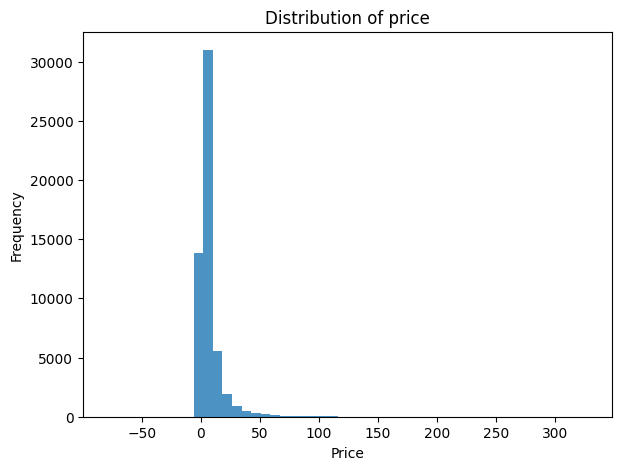

In [ ]:
# Histogram with price
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df.drop_duplicates(subset='product_id')['price'], bins=50, alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of price')

The prices on the shopping website are **left-skewed**, with almost all falling **below 50**. The distribution shows that prices close to zero have the highest frequency. We can create a pie chart by segmenting the prices into 4 ranges: *0-5, 5-25, 25-50, and above 50*.

In [ ]:
# Derive dataset for distinct products
data_product = df.drop_duplicates(subset='product_id')
data_product

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-11-04 18:50:11+00:00,view,5885574,1487580013950664926,markell,8.78,523808159,0f68fc68-3600-4feb-8bd1-9f89d96229c2
1,2020-02-10 10:53:30+00:00,view,5713017,1487580008011531230,coifin,63.48,599102798,bddfe4ee-1ebd-4cd6-af33-6788efee01d8
2,2020-01-30 02:28:22+00:00,view,5910417,1487580008053474272,dewal,22.19,607954171,a214b8fe-4d16-4857-bc9f-670f8e4aa71e
3,2019-12-22 17:47:03+00:00,purchase,5913387,1487580008112194531,dewal,7.57,459377142,86ee6c63-a4c7-41bb-993a-8df9679d06eb
4,2020-01-17 12:37:43+00:00,view,5862564,1487580008145748965,roubloff,1.71,561581928,c83b714c-25be-4db9-8231-1656b6e8341c
...,...,...,...,...,...,...,...,...
20603612,2019-11-12 21:49:25+00:00,view,5690826,1487580004857414477,lianail,6.33,570758403,f52ef080-b1eb-48c1-a7b2-786275da305e
20604448,2020-01-21 07:04:32+00:00,view,5860316,1487580004857414477,lianail,2.78,585730503,cf597acb-506e-435a-ada7-1a5079dc235c
20613821,2019-10-30 07:00:22+00:00,view,5882726,1487580005050352469,haruyama,3.97,559070555,9328aa1d-ef22-4c40-89cb-11b26c7ba849
20614890,2020-01-03 18:00:05+00:00,view,5763607,1487580007717929935,ingarden,0.95,595672467,d4a44358-ebc6-44d7-9ae7-63380c8cfdf5


In [ ]:
# Categorize products based on price ranges
bins = [0, 5, 25, 50, float('inf')]
labels = ['0-5', '5-25', '25-50', 'Above 50']
price_range_data = pd.cut(data_product['price'], bins=bins, labels=labels).reset_index()
price_range_data.head(5)

,index,price
0,0,5-25
1,1,Above 50
2,2,5-25
3,3,5-25
4,4,0-5


In [ ]:
# Count the number of products in each price range
price_range_counts = price_range_data['price'].value_counts().reset_index()
price_range_counts.columns = ['price', 'count']

# Create a donut chart using Plotly Express
fig = px.pie(price_range_counts, values='count', names='price', hole=0.3,
             labels={'price': 'Price Range'},
             title='Distribution of Products by Price Range')

# Show the donut chart
fig.show()

Most frequent prices fall in the range from **0 to 5** (almost 52% of all products). In constrast, product with price that **above 500 accounts for less than 2%** of the products. How about the brand? The price range of each brand are be segmented by using *median price values*:

In [ ]:
# Median price of each brand
median_price = df.groupby('brand')['price'].median().reset_index()
median_price

,brand,price
0,airnails,1.59
1,almea,31.43
2,andrea,5.54
3,ardell,6.37
4,arganoil,10.67
...,...,...
268,ypsed,21.79
269,yu-r,33.33
270,zab,16.03
271,zeitun,11.03


In [ ]:
median_range_data = pd.cut(median_price['price'], bins=bins, labels=labels)

# Count the number of products in each price range
median_range_counts = median_range_data.value_counts()

# Create a donut chart using Plotly Express
fig = px.bar(data_frame=median_range_counts, x=median_range_counts,y=median_range_counts.index,
            orientation='h', labels={'x': 'Number of brands', 'y': 'Median Price Range'},
             title='Number of Brands by Median Price Range')

# Show the donut chart
fig.show()

The presence of a significant number of brands in the **5-25 range** suggests a consumer demand for **mid-range products** with advanced features.

#### **Events of Time Session**

Now we are going to split `event_time` into **date** and **time**, also extract **weekday** from date feature for further customer behavior analysis:

In [ ]:
# Split into date and time
df['event_time'] = pd.to_datetime(df['event_time'])
df['date'] = pd.to_datetime(df['event_time'].dt.date)
df['time'] = df['event_time'].dt.time
df['weekday'] = df['date'].dt.weekday

In [ ]:
df.drop('event_time', axis='columns')
df = df[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'brand', 'price', 'user_id', 'user_session']]
df.head(5)

,date,weekday,time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2020-02-21,4,14:10:46,view,5713016,1487580008011531230,coifin,57.14,618371519,7c29f1ed-0150-472a-8dfb-9439a63e9dff
1,2020-02-23,6,14:09:39,view,5910420,1487580008028308447,dewal,38.30,619276403,61db320b-c8a2-404c-b98c-dcd499c4a767
2,2019-12-23,0,15:14:41,remove_from_cart,5915205,1487580008070251489,babyliss,31.08,584444802,2873a64e-b016-4d5f-b90f-93b21c733e34
3,2020-02-07,4,18:08:48,cart,5911114,1487580008112194531,dewal,1.49,611765552,e83c704b-9559-4cd3-add8-77b58d5e4ad7
4,2020-01-23,3,07:04:28,view,5738967,1487580008187692007,roubloff,34.13,462301863,d0c71d03-ac03-4924-894f-7042369e2989


In [ ]:
df['date'] = df['date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20688242 entries, 0 to 20692839
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   weekday       int64  
 2   time          object 
 3   event_type    object 
 4   product_id    Int64  
 5   category_id   Int64  
 6   brand         object 
 7   price         float64
 8   user_id       Int64  
 9   user_session  object 
dtypes: Int64(3), float64(1), int64(1), object(5)
memory usage: 1.8+ GB


<ipython-input-33-b7a9eb2530f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **2. Data Analysis with Market Insights**

1. **Consumer Behavior:**
 * Graphs illustrating the consumer journey (from interest to purchase).
2. **Category and Brand Analysis:**
 * Graphs to show the most popular categories and brands (based on views and purchases).
 * Price range analysis by category and brand.
3. **Event Distribution** (*Viewing, Cart, Cart Removal, Purchase*):
 * Bar graphs to show the frequency of each type of event.
 * Conversion analysis (from view to purchase).

#### **Consumer Behavior**

Each **customer** is assigned **their own ID** for the corresponding customer account/IP. The dataset reflects **customer behavior** based on the events that they interacted with on the *e-commerce cosmetics store platform.*


In [ ]:
df.loc[df.user_session == "25415286-97b2-4174-8d66-36cee689fd9a"].sort_values(by=['date', 'time'])

,date,weekday,time,event_type,product_id,category_id,brand,price,user_id,user_session
2348589,2019-12-24,1,10:39:59,view,5865141,1648815651034235876,rosi,4.13,591786331,25415286-97b2-4174-8d66-36cee689fd9a
2855766,2019-12-24,1,10:40:52,view,5865130,1648815651034235876,rosi,4.13,591786331,25415286-97b2-4174-8d66-36cee689fd9a
11243984,2019-12-24,1,10:44:54,view,5780837,1487580005092295511,rosi,7.86,591786331,25415286-97b2-4174-8d66-36cee689fd9a
4733197,2019-12-24,1,10:47:55,view,5915803,1648815651034235876,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
1291735,2019-12-24,1,10:48:05,view,5915804,1648815651034235876,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
10619365,2019-12-24,1,10:48:12,view,5915805,1648815651034235876,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
1050425,2019-12-24,1,10:48:25,view,5915807,1648815651034235876,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
7903660,2019-12-24,1,10:48:32,view,5915808,1648815651034235876,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
12157674,2019-12-24,1,10:48:51,view,5915992,1487580005092295511,None,0.00,591786331,25415286-97b2-4174-8d66-36cee689fd9a
62220,2019-12-24,1,10:50:25,view,5865125,1648815651034235876,rosi,4.13,591786331,25415286-97b2-4174-8d66-36cee689fd9a


**Buying Habits**

Derive data that people decided to *purchase*:

In [ ]:
data_purchase = df[df['event_type']=='purchase']
data_nonpurchase = df[df['event_type']!='purchase']
data_purchase.describe()

,weekday,product_id,category_id,price,user_id
count,1.287007e+06,1287007.0,1287007.0,1.287007e+06,1287007.0
mean,2.905593e+00,5439027.434746,4321024883028.412598,4.932378e+00,511927675.526091
std,1.953696e+00,1381411.804421,167407928173479488.0,8.924841e+00,93565209.609842
min,0.000000e+00,3762.0,1487580004807082752.0,-7.937000e+01,9794320.0
25%,1.000000e+00,5712575.0,1487580005855658752.0,1.590000e+00,468907816.0
50%,3.000000e+00,5809307.0,1487580008246412288.0,3.000000e+00,545998157.0
75%,4.000000e+00,5854123.0,1487580013011140864.0,5.400000e+00,574757344.0
max,6.000000e+00,5932583.0,2242903426784559104.0,3.277800e+02,622073202.0


As you can see, we have 4 kinds of customer-product interactions including:

- **view**: a user viewed a product

- **cart**: a user added a product to shopping cart

- **remove_from_cart**: a user removed a product from shopping cart

- **purchase**: a user purchased a product

Below chart illustrate the distribution of events throughout whole dataset, it is observed that there are only 3 kinds of interations (excluding *remove_from_cart*) in this specific month.

In [ ]:
# Donut chart of event_type
event_types = df['event_type'].unique()
event_types_count = df['event_type'].value_counts()
fig = px.pie(names=event_types, values=event_types_count, hole=0.3)
fig.update_layout({"title":{"text":"Distibution of classes", "x":0.50}})
fig.show()

**Time Distribution Analysis**

In [ ]:
# Add hour column
df['hour'] = df['time'].apply(lambda t: t.hour)

In [ ]:
# Get event counts per hour data
event_types = ['view', 'cart', 'purchase']

event_by_hour = {}
for event_type in event_types:
    event_count = df[df.event_type == event_type].groupby("hour")["event_type"].count()
    event_by_hour[event_type] = event_count

event_by_hour = pd.DataFrame(event_by_hour)

In [ ]:
# Plot bar chart
fig = px.bar(event_by_hour, x=event_by_hour.index, y=event_types,
             title="Distribution of Events by Hour",
             labels={"x": "Hour in a Day", "y": "Number of Events"},
             template="plotly_white")

# Show the plot
fig.show()

In [ ]:
# Event type percent by hour
for event_type in event_types:
    event_by_hour[f'{event_type}_percent'] = event_by_hour[event_type]/event_by_hour[event_type].sum()


# Line plot
fig = px.line(event_by_hour, x=event_by_hour.index, y=[f'{event_type}_percent' for event_type in event_types],
              title="Percentage Distribution of Events by Hour",
              labels={"x": "Hour in a Day", "y": "Percentage"},
              template="plotly_white")
fig.show()

In [ ]:
# Get event by weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

event_by_weekday = {}
for event_type in event_types:
    event_count = df[df.event_type == event_type].groupby("weekday")["event_type"].count()
    event_by_weekday[event_type] = event_count

event_by_weekday = pd.DataFrame(event_by_weekday)

# Event type percent by weekday
for event_type in event_types:
    event_by_weekday[f'{event_type}_percent'] = event_by_hour[event_type]/event_by_hour[event_type].sum()

# Plot bar chart
fig = px.line(event_by_weekday, x=weekdays, y=[f'{event_type}_percent' for event_type in event_types],
              title="Percentage Distribution of Events by Weekday",
              labels={"x": "Weekday", "y": "Percentage"},
              template="plotly_white")
fig.show()

####  **Category and Brand Analysis**

In the context of analyzing an e-commerce dataset, the ***Category and Brand Analysis*** focuses on understanding the dynamics and performance of different product categories and brands within the online store. This analysis involves examining how various categories and brands fare in terms of user engagement events such as views, cart additions, purchases, and removals from the cart. It helps identify which product categories and brands are most popular, which ones are leading in sales, and how they compare in terms of pricing strategies.

This analysis can reveal consumer preferences and trends, allowing for targeted marketing strategies, inventory management, and pricing optimizations. By understanding the performance of different categories and brands, businesses can make informed decisions to enhance product offerings, promote high-performing brands or categories, and improve customer engagement and satisfaction.

In [ ]:
# Categorize products based on price ranges
price_range_data = pd.cut(data_purchase['price'], bins=bins, labels=labels).reset_index()
# Count the number of products in each price range
price_range_counts = price_range_data['price'].value_counts().reset_index()
price_range_counts.columns = ['price', 'count']

# Create a donut chart using Plotly Express
fig = px.pie(price_range_counts, values='count', names='price', hole=0.3,
             labels={'price': 'Price Range'},
             title='Distribution of Products by Price Range (purchased)')

# Show the donut chart
fig.show()

In [ ]:
# Top sellers
purchase_with_brands = data_purchase.loc[data_purchase.brand.notnull()]
top_sellers = purchase_with_brands.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=False).reset_index()
print(top_sellers.head(20))

        brand     len
0      runail  111408
1       irisk   73806
2      masura   49751
3     grattol   49542
4   bpw.style   37943
5    ingarden   27411
6       estel   19438
7         uno   17586
8   freedecor   17467
9     italwax   17105
10     kapous   16335
11      domix   12958
12       milv   12691
13   haruyama   11582
14       pole   11578
15    bluesky   11509
16   jessnail    9661
17    concept    9530
18   severina    9173
19     zinger    9022


In [ ]:
# Total order per time by brands
order_per_weekday = df[df.event_type == "purchase"].groupby(["weekday", "brand"])["event_type"].count().reset_index()
order_per_weekday.head(10)

,weekday,brand,event_type
0,0,airnails,1013
1,0,almea,21
2,0,ardell,117
3,0,arganoil,1
4,0,art-visage,621
5,0,artex,205
6,0,aura,16
7,0,avene,5
8,0,babyliss,11
9,0,balbcare,52


In [ ]:
# Calculate total orders per brand
brand_total_orders = order_per_weekday.groupby("brand")["event_type"].sum().reset_index()
top_brands = brand_total_orders.nlargest(10, "event_type")["brand"]

# Filter order_per_weekday for top brands
order_per_weekday_top_brands = order_per_weekday[order_per_weekday["brand"].isin(top_brands)]
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
order_per_weekday_top_brands["weekday"] = order_per_weekday_top_brands["weekday"].map(weekday_names)


fig = px.bar(order_per_weekday_top_brands, x="weekday", y="event_type", color="brand",
             title="Total Orders per Brand per Weekday (Top 10 Brands)",
             labels={"weekday": "Weekday", "event_type": "Total Orders"},
             template="plotly_white")

# Show the plot
fig.show()

<ipython-input-47-b5f44ce9d95a>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Total revenue
revenue_by_brands = df.groupby('brand')['price'].sum().sort_values(ascending=False).reset_index(name='monthly_revenue')

fig = px.bar(revenue_by_brands[:10], x='brand', y='monthly_revenue',
             title="Total Revenue of eCommerce Shop (Top 10 Brands)",
             labels={"brand": "Brands", "monthly_revenue": "Total Revenue"}, text='monthly_revenue')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
# Daily sale revenue
revenue_by_day = df.groupby(['date', 'brand'])['price'].sum().reset_index(name='daily_revenue')

# Get the top 5 brands by revenue
top5_revenue_brands = revenue_by_day.groupby('brand')['daily_revenue'].sum().nlargest(5).index
revenue_by_day['brand_grouped'] = revenue_by_day['brand'].apply(lambda x: x if x in top5_revenue_brands else 'Other')

# Take top 5
revenue_day_top5 = revenue_by_day[revenue_by_day['brand_grouped']!='Other']

# Line chart
fig = px.line(revenue_day_top5, x='date', y='daily_revenue', color='brand_grouped',
              labels={'date': 'Date', 'daily_revenue': 'Daily Revenue'},
              title='Daily Revenue by Brand (Top 5 Brands)',
              category_orders={'brand_grouped': list(top5_revenue_brands)})


fig.update_layout(legend_title_text='Brand',
                  legend=dict(orientation='h', x=0, y=1.02, xanchor='left', yanchor='bottom'))

fig.show()

This analysis gives us an ***overview*** of how different categories and brands perform in terms of user engagement and price ranges. We can dig deeper to **understand which categories and brands are more popular or generate more revenue**, as well as study price trends in relation to popularity and conversion rate.

**Insights for Business Analytics:**

* **Focus on Popular Categories and Brands:** Increase inventory and product diversification in the most viewed categories and brands.

* **Pricing Strategies:** Look at categories and brands with higher average prices for marketing and promotions strategies.

* **Conversion Optimization:** Invest in strategies to convert views into purchases, such as improving product descriptions, offering promotions, or enhancing the user experience on the website.

In [ ]:
# What are the most purchased brands?

# Filter the dataset for 'purchase' events
purchases = df[df['event_type'] == 'purchase']

# Count the number of purchases for each brand
brand_purchase_counts = purchases['brand'].value_counts()

# Display the top brands with most purchases
top_purchased_brands = brand_purchase_counts.head(10)
top_purchased_brands


runail       111408
irisk         73806
masura        49751
grattol       49542
bpw.style     37943
ingarden      27411
estel         19438
uno           17586
freedecor     17467
italwax       17105
Name: brand, dtype: int64

To find the most purchased brands, we need to filter the data for events where event_type is 'purchase', and then count the number of occurrences for each brand. This will give us an indication of the most popular brands in terms of purchase frequency.

In [ ]:
# Who purchased the most products and what do they buy?

# Filter the dataset for 'purchase' events
purchase_data = df[df['event_type'] == 'purchase']

# Count the number of purchases for each user
user_purchase_counts = purchase_data['user_session'].value_counts()

# Identify the user who made the most purchases
top_purchaser_id = user_purchase_counts.idxmax()
top_purchaser_purchases = user_purchase_counts.max()

# Display the user who made the most purchases and the number of purchases they made
top_purchaser_id, top_purchaser_purchases


('144ecfc6-9716-731c-b95f-d088cdf11d88', 429)

To identify the user who purchased the most products and to understand what products they bought, we'll follow these steps:

1. Filter the dataset for purchase events.
2. Aggregate the data by user_id to find the user with the highest number of purchases.
3. Once we identify the top purchaser, we will then look at the specific products they bought.

In [ ]:
# Filter the purchase data for the top purchaser
top_purchaser_data = purchase_data[purchase_data['user_id'] == top_purchaser_id]

# Extract relevant information about the products purchased by the top purchaser
top_purchaser_products = top_purchaser_data[['product_id', 'brand', 'price']]

top_purchaser_products

In [ ]:
# Who are the top 5 buyers in terms of dollar amount?

# Group by user_id and sum the prices for each user
user_total_spent = purchase_data.groupby('user_id')['price'].sum()

# Sort the users based on total amount spent in descending order
top_buyers = user_total_spent.sort_values(ascending=False).head(5)

top_buyers

user_id
150318419    3785.03
531900924    3446.90
562167663    2969.45
471197852    2938.91
469299888    2934.13
Name: price, dtype: float64

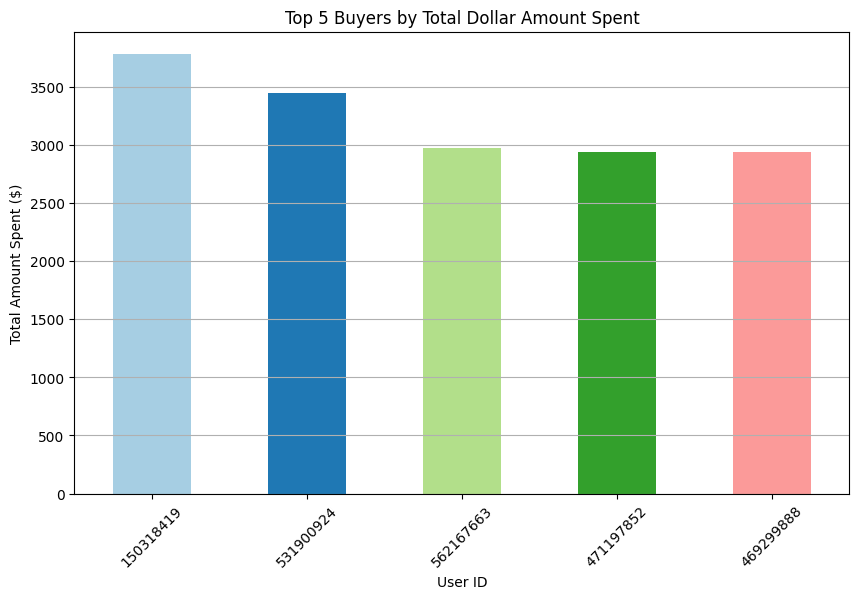

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot for the top buyers
plt.figure(figsize=(10, 6))
top_buyers.plot(kind='bar', color=plt.cm.Paired.colors)

# Adding titles and labels
plt.title('Top 5 Buyers by Total Dollar Amount Spent')
plt.xlabel('User ID')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


### **Event Distribution**

In the context of the provided dataset from an online cosmetics store, this analyze involves examining the frequency and types of interactions that users have with products on the website. These interactions are categorized into different types of events, each representing a specific action taken by the users. The main event types in this dataset are:

1. **View**: This event is recorded when a user views a product. It indicates initial interest or curiosity about the product.

2. **Cart**: This event occurs when a user adds a product to their shopping cart. It's a stronger indication of purchase intent than a view.

3. **Remove from Cart**: This event is logged when a user removes a product from their shopping cart. It often signifies a change of mind or a decision against purchasing the product.

4. **Purchase**: This event is the actual purchase of a product by a user. It's the most critical event as it directly relates to sales.


Analyzing the distribution of these events can provide valuable insights into consumer behavior and the effectiveness of the website's user interface and marketing strategies. Key aspects of this analysis might include:

- **Frequency of Each Event Type**: Understanding how often each type of event occurs can reveal which stages of the customer journey are the most and least engaged. For instance, a high number of views but low number of purchases might indicate a problem in converting interest into sales.

- **Conversion Rates**: Calculating the rate at which views convert to cart additions and purchases can help assess the effectiveness of the product listings and the overall sales funnel.

- **User Engagement**: Analysis can show how users interact with the website, including which products attract the most attention and which ones successfully lead to sales.

- **Strategic Insights for Marketing and Sales**: Understanding which products are frequently added to carts but not purchased might indicate pricing or product description issues. Similarly, products with high views but low cart additions might need better positioning or promotional strategies.

In summary, analyzing event distribution in this context is about understanding how users interact with the online store's products and identifying opportunities to enhance the shopping experience, thereby potentially increasing sales and customer satisfaction.

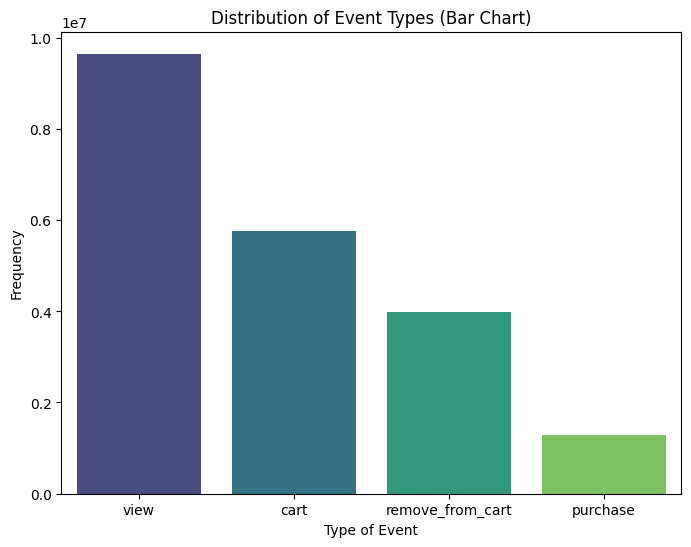

In [ ]:
# 1. Bar Plot of Event Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=event_type_distribution.index, y=event_type_distribution.values, palette='viridis')
plt.title('Distribution of Event Types (Bar Chart)')
plt.xlabel('Type of Event')
plt.ylabel('Frequency')
plt.show()

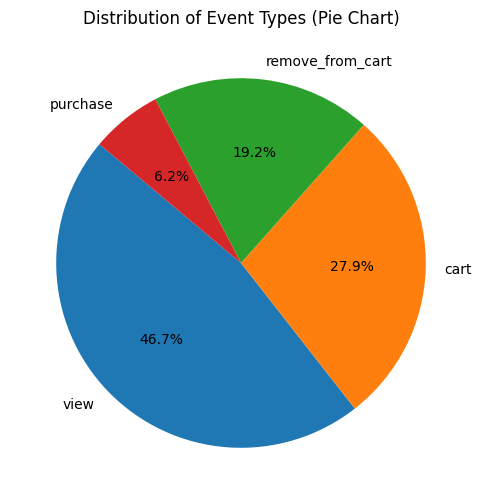

In [ ]:
# 2. Pie Chart of Event Distribution
plt.figure(figsize=(8, 6))
plt.pie(event_type_distribution, labels=event_type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Event Types (Pie Chart)')
plt.show()

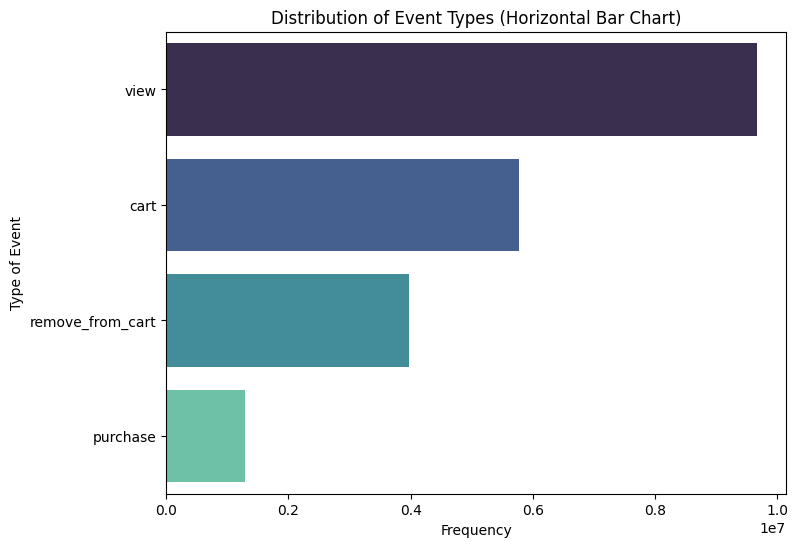

In [ ]:
# 3. Horizontal Bar Chart for Event Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=event_type_distribution.values, y=event_type_distribution.index, palette='mako', orient='h')
plt.title('Distribution of Event Types (Horizontal Bar Chart)')
plt.xlabel('Frequency')
plt.ylabel('Type of Event')
plt.show()

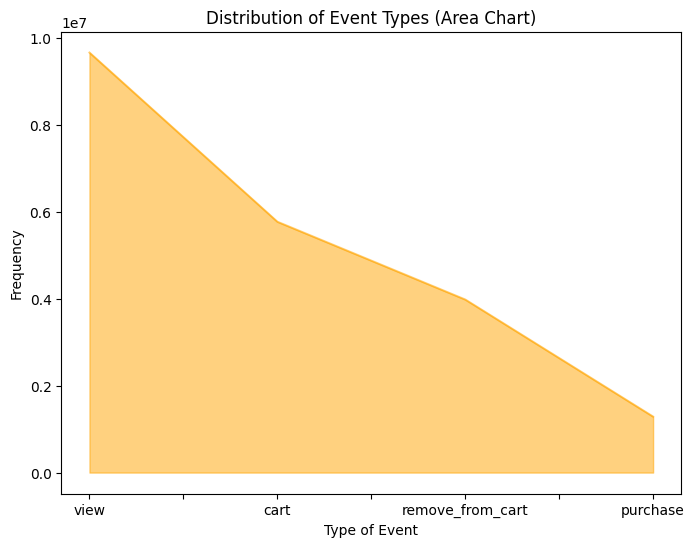

In [ ]:
# 4. Area Chart for Trends Over Time
plt.figure(figsize=(8, 6))
event_type_distribution.plot(kind='area', color='orange', alpha=0.5)
plt.title('Distribution of Event Types (Area Chart)')
plt.xlabel('Type of Event')
plt.ylabel('Frequency')
plt.show()

These charts would help illustrate the nature of user engagements with the site, enabling business analysts to identify opportunities to optimize the sales funnel, enhance customer experience, and increase conversion.

With this analysis it is easy to:  

* Identifies which stage of the sales funnel has the highest or lowest engagement, allowing focus on strategies to improve conversion at each stage.
* Provides a clear view of the distribution of events, helping to identify what actions users take most on the site.
*  Facilitates direct comparison between the frequencies of different types of events, allowing for quick identification of the most and least frequent.
* Allows the identification of trends and patterns over time, such as increases or decreases in buying or viewing activity.

## **3. Marketing Business Intelligence | Insights and Suggestions**

Based on the analyzed information, here are some *key insights* and *suggestions* for **marketing business intelligence**:

**1. Product Pricing Strategy**
- **Insight**: Presence of many zero-priced and low-priced products may indicate data issues or unique pricing strategies like promotions.
- **Suggestion**: Regularly review and cleanse pricing data. Segment products into different pricing tiers for targeted marketing and pricing strategies.

**2. Brand Positioning and Inventory Management**
- **Insight**: Variations in product prices across brands suggest different market positioning (premium vs. budget).
- **Suggestion**: Tailor marketing messages to brand positioning. Manage inventory based on brand popularity and pricing trends.

**3. Customer Engagement and Sales Funnel Optimization**
- **Insight**: Event type analysis (views, carts, purchases) reveals customer interaction levels in the sales funnel.
- **Suggestion**: Develop strategies to effectively move customers through the sales funnel, like personalized recommendations for frequent viewers.

**4. Temporal Patterns in Customer Behavior**
- **Insight**: Time series analysis shows trends and seasonality in customer behavior.
- **Suggestion**: Use these insights to time marketing campaigns, manage inventory, and introduce dynamic pricing in peak periods.

**5. Data-Driven Decision Making**
- **Insight**: The analysis highlights the importance of data in understanding customer preferences and market trends.
- **Suggestion**: Encourage a data-driven culture. Analyze customer data regularly for informed decision-making and market trend anticipation.




---



## **Part. 2 - Technical Challenge Analysis - New dataset** [Makeup API](https://makeup-api.herokuapp.com/)

Again we can use SQL to query our ***BigQuery*** data about **Makeup** and save the output of this *query* as a dataframe with the code:

In [ ]:
#Replace 'dataset_name' with your actual dataset name
#Replace 'table_name' with the name of the table you want to query

sql_query = ('''SELECT *
                FROM dataset_cs_ecommerce.products_data_makeup
                ''')

df_prod = client.query(sql_query).to_dataframe()

### **1. New Data Overview**

Once again, since this is a **new dataset** with no correlation to the previous one, it is important to provide **an overview** of the information available about this *data*. Lets do this:

In [ ]:
# Show a general view of data
# Look at the first 10 rows.
df_prod.head(10)

,id,brand,name,price,currency,rating,category,product_type,created_at,updated_at
0,966,nyx,Cosmic Gel Liner,10.0,USD,NaN,gel,eyeliner,2017-12-24 02:32:26.896000+00:00,2017-12-24 02:32:27.267000+00:00
1,965,nyx,Gel Liner And Smudger,9.0,USD,NaN,gel,eyeliner,2017-12-24 02:32:25.619000+00:00,2017-12-24 02:32:25.974000+00:00
2,674,dior,FLASH LUMINIZER,29.0,GBP,NaN,highlighter,foundation,2017-12-03 23:22:20.685000+00:00,2017-12-23 20:59:04.893000+00:00
3,788,clinique,Chubby Stick&trade; Sculpting Highlight,23.0,USD,NaN,contour,foundation,2017-12-23 23:35:06.969000+00:00,2017-12-23 23:38:33.306000+00:00
4,787,clinique,Chubby Stick&trade; Sculpting Contour,23.0,USD,NaN,contour,foundation,2017-12-23 23:35:06.871000+00:00,2017-12-23 23:38:32.856000+00:00
5,786,clinique,Limited Edition Highlighting Kit,39.0,USD,NaN,contour,foundation,2017-12-23 23:35:06.486000+00:00,2017-12-23 23:38:32.270000+00:00
6,1001,glossier,Haloscope,27.0,USD,NaN,highlighter,foundation,2017-12-27 02:44:12.059000+00:00,2017-12-27 02:58:27.019000+00:00
7,1021,marienatie,Gel Liner,0.0,USD,NaN,gel,eyeliner,2018-06-30 19:19:30.898000+00:00,2018-09-02 22:52:06.494000+00:00
8,1040,zorah biocosmetiques,Eyeshadow,0.0,USD,NaN,None,eyeshadow,2018-06-30 19:19:32.252000+00:00,2018-09-02 22:52:06.714000+00:00
9,1038,sally b's skin yummies,B Smudged,0.0,USD,NaN,None,eyeshadow,2018-06-30 19:19:32.132000+00:00,2018-09-02 22:52:06.697000+00:00


In [ ]:
# Information about the DataFrame (data types, number of non-null values, etc.):
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            931 non-null    Int64              
 1   brand         919 non-null    object             
 2   name          931 non-null    object             
 3   price         917 non-null    float64            
 4   currency      368 non-null    object             
 5   rating        340 non-null    float64            
 6   category      507 non-null    object             
 7   product_type  931 non-null    object             
 8   created_at    931 non-null    datetime64[ns, UTC]
 9   updated_at    931 non-null    datetime64[ns, UTC]
dtypes: Int64(1), datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 73.8+ KB


In [ ]:
# Summarize the dataset
df_prod.describe()

,id,price,rating
count,931.0,917.000000,340.000000
mean,531.163265,16.508593,4.319118
std,311.054915,11.028035,0.675849
min,1.0,0.000000,1.500000
25%,263.0,8.990000,4.000000
50%,518.0,13.990000,4.500000
75%,814.5,22.000000,5.000000
max,1048.0,77.000000,5.000000


In [ ]:
# Simple count
total_stats = df_prod.count()
print(total_stats)

id              931
brand           919
name            931
price           917
currency        368
rating          340
category        507
product_type    931
created_at      931
updated_at      931
dtype: int64


In [ ]:
# Count null values
df_prod.isnull().sum()

id                0
brand            12
name              0
price            14
currency        563
rating          591
category        424
product_type      0
created_at        0
updated_at        0
dtype: int64

In [ ]:
# DataFrame dimensions (number of rows and columns):
df_prod.shape

(931, 10)

In [ ]:
# Remove the 'currency'and 'rating' column from the dataframe
df_prod = df_prod.drop(columns=['currency', 'rating'])
# Display the first few rows of the modified dataframe to confirm the change
df_prod.head()

,id,brand,name,price,category,product_type,created_at,updated_at
0,966,nyx,Cosmic Gel Liner,10.0,gel,eyeliner,2017-12-24 02:32:26.896000+00:00,2017-12-24 02:32:27.267000+00:00
1,965,nyx,Gel Liner And Smudger,9.0,gel,eyeliner,2017-12-24 02:32:25.619000+00:00,2017-12-24 02:32:25.974000+00:00
2,674,dior,FLASH LUMINIZER,29.0,highlighter,foundation,2017-12-03 23:22:20.685000+00:00,2017-12-23 20:59:04.893000+00:00
3,788,clinique,Chubby Stick&trade; Sculpting Highlight,23.0,contour,foundation,2017-12-23 23:35:06.969000+00:00,2017-12-23 23:38:33.306000+00:00
4,787,clinique,Chubby Stick&trade; Sculpting Contour,23.0,contour,foundation,2017-12-23 23:35:06.871000+00:00,2017-12-23 23:38:32.856000+00:00


In [ ]:
# Count null values
df_prod.isnull().sum()

id                0
brand            12
name              0
price            14
category        424
product_type      0
created_at        0
updated_at        0
dtype: int64

Well, for this **second stage of the Technical Challenge** we have two datasets that are not correlated, but it **is necessary to arbitrarily cross** the product identifiers between them so that we have data about products and their respective categories.

In order to **randomly correlate product identifiers**, a mapping can be established between the makeup set `id` and `product_id` from `all_events_2019_to_2020`. A random match will be created between these identifiers, associating each `id` in the makeup set with a random `product_id` in the first dataset.

In [ ]:
# Lendo os dados
makeup_data = df_prod
events_data = df

# Exibindo as primeiras linhas de cada conjunto de dados para entender sua estrutura
makeup_data_head = makeup_data.head()
events_data_head = events_data.head()

makeup_data_head, events_data_head


(    id     brand                                     name  price currency  \
 0  966       nyx                         Cosmic Gel Liner   10.0      USD   
 1  965       nyx                    Gel Liner And Smudger    9.0      USD   
 2  674      dior                          FLASH LUMINIZER   29.0      GBP   
 3  788  clinique  Chubby Stick&trade; Sculpting Highlight   23.0      USD   
 4  787  clinique    Chubby Stick&trade; Sculpting Contour   23.0      USD   
 
    rating     category product_type                       created_at  \
 0     NaN          gel     eyeliner 2017-12-24 02:32:26.896000+00:00   
 1     NaN          gel     eyeliner 2017-12-24 02:32:25.619000+00:00   
 2     NaN  highlighter   foundation 2017-12-03 23:22:20.685000+00:00   
 3     NaN      contour   foundation 2017-12-23 23:35:06.969000+00:00   
 4     NaN      contour   foundation 2017-12-23 23:35:06.871000+00:00   
 
                         updated_at  
 0 2017-12-24 02:32:27.267000+00:00  
 1 2017-12-24 

The new dataset has been created successfully. It includes information from the makeup dataset, such as `makeup_id`, `makeup_brand`, `makeup_name`, `makeup_category`, and `makeup_product_type`, and arbitrarily correlates them with information from the events ecommerce dataset, such as `mapped_product_id`, `nov_category_id`, `nov_category_code`, `nov_brand`, and `nov_price`.

In [ ]:
import numpy as np

# Gerando um mapeamento aleatório entre os IDs dos produtos dos dois conjuntos de dados
np.random.seed(0)  # Para reprodutibilidade
mapped_ids = np.random.choice(events_data['product_id'].unique(), size=len(makeup_data), replace=False)

# Criando um DataFrame com o mapeamento
mapping_df = pd.DataFrame({
    'makeup_id': makeup_data['id'],
    'mapped_product_id': mapped_ids
})

# Mesclando o mapeamento com os dados originais
merged_data = pd.merge(mapping_df, makeup_data, left_on='makeup_id', right_on='id', how='left')
merged_data = pd.merge(merged_data, events_data, left_on='mapped_product_id', right_on='product_id', how='left')

# Selecionando colunas relevantes para o novo conjunto de dados
final_data = merged_data[['makeup_id', 'brand_x', 'name', 'category', 'product_type', 'mapped_product_id', 'category_id', 'brand_y', 'price_y']]

# Renomeando colunas para maior clareza
final_data.columns = ['makeup_id', 'makeup_brand', 'makeup_name', 'makeup_category', 'makeup_product_type', 'mapped_product_id', 'nov_category_id', 'nov_brand', 'nov_price']

# Exibindo as primeiras linhas do novo conjunto de dados
final_data.head()


,makeup_id,makeup_brand,makeup_name,makeup_category,makeup_product_type,mapped_product_id,nov_category_id,nov_brand,nov_price
0,966,nyx,Cosmic Gel Liner,gel,eyeliner,5726394,1487580005092295511,None,5.56
1,966,nyx,Cosmic Gel Liner,gel,eyeliner,5726394,1487580005092295511,None,5.56
2,966,nyx,Cosmic Gel Liner,gel,eyeliner,5726394,1487580005092295511,None,5.56
3,966,nyx,Cosmic Gel Liner,gel,eyeliner,5726394,1487580005092295511,None,5.56
4,966,nyx,Cosmic Gel Liner,gel,eyeliner,5726394,1487580005092295511,None,5.56


Now, this **table** can be used for **analyzes that consider both data sources**.

### **2. New Data Analysis**

First, let's look at the **new product category information** (`makeup_category`) associated (*randomly*) with the `product_id` of the dataset from the **mid-sized cosmetics online store** (*first part of this notebook*).

In [ ]:
# Donut chart of main_category
mainCat_values = final_data.groupby('makeup_category')['mapped_product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
mainCat_values

makeup_category
lipstick       122
liquid         117
powder          68
pencil          62
cream           34
palette         27
lip_gloss       26
concealer       19
mineral         11
bb_cc            9
lip_stain        4
contour          3
gel              3
highlighter      2
Name: mapped_product_id, dtype: int64

In [ ]:
# Pie chart for main-categories
print('Number of Categories: ', len(mainCat_names))
fig = px.pie(names=mainCat_names, values=mainCat_values, hole=0.3)
fig.update_layout({"title":{"text":"Main Category distribution", "x":0.50}})
fig.show()

Number of Categories:  14


For products types:

In [ ]:
# Donut chart of Product Type - Top 10
subCat_values = final_data.groupby('makeup_product_type')['mapped_product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
subCat_values

makeup_product_type
foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
Name: mapped_product_id, dtype: int64

In [ ]:
# Pie chart for sub-categories
print('Number of Products Type: ', len(subCat_names))

# # Create a new array of sub-category values with the summed value of sub-categories not in top 10
other_value = subCat_values[10:].sum()
subCat_names_with_other = np.append(subCat_names[:10], 'Other')
subCat_names_with_other  = np.append(subCat_values[:10], other_value)

fig = px.pie(names=subCat_names_with_other , values=subCat_names_with_other , hole=0.3)
fig.update_layout({"title":{"text":"Product Type distribution", "x":0.50}})
fig.show()

Number of Products Type:  10


In [ ]:
# Create data of product categories and types with counts of products
category_counts = final_data.drop_duplicates(subset='mapped_product_id').groupby(['makeup_category', 'makeup_product_type']).size().reset_index(name='count')

# Treemap plot
fig = px.treemap(category_counts, path=[px.Constant("all"), 'makeup_category', 'makeup_product_type'], values='count',
                  color='count', hover_data=['count'],
                  color_continuous_scale='YlGnBu',)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#### 2.1. Product and Category Analysis

**Note:**

In order to facilitate analysis and interpretation of the results, and to introduce new information in this second stage of the technical challenge, we will substitute the product brands from the **eCommerce Events History in Cosmetics Shop** dataset with brands from the **Makeup-api Heroku app** dataset. This will allow us to discover a wider range of correlations between categories, types of products, and their brands.

It is important to **remember** that **this mapping is arbitrary** and does not **represent a real correlation** between the products **of the two datasets**. But, although the mapping between the data sets is arbitrary, **these analyses can provide valuable insights for marketing strategies, product development, and customer experience**. The key is to interpret the results carefully, considering the artificial nature of the data mapping.

So, for new analyzes of the number of distinct categories per **Makeup Brand** (*only brands originating from makeup dataset*):


In [ ]:
# Contando o número de categorias distintas por marca
categories_per_brand = makeup_data.groupby('brand')['category'].nunique().reset_index()

# Renomeando colunas para melhor entendimento
categories_per_brand.columns = ['Brand', 'Number of Unique Categories']

categories_per_brand.sort_values(by='Number of Unique Categories', ascending=False)


,Brand,Number of Unique Categories
37,nyx,9
45,revlon,7
11,clinique,7
30,maybelline,7
24,iman,6
41,physicians formula,6
17,dior,6
14,covergirl,6
25,l'oreal,6
31,milani,5


**Insights:** Most Popular Categories and Diverse Brands.

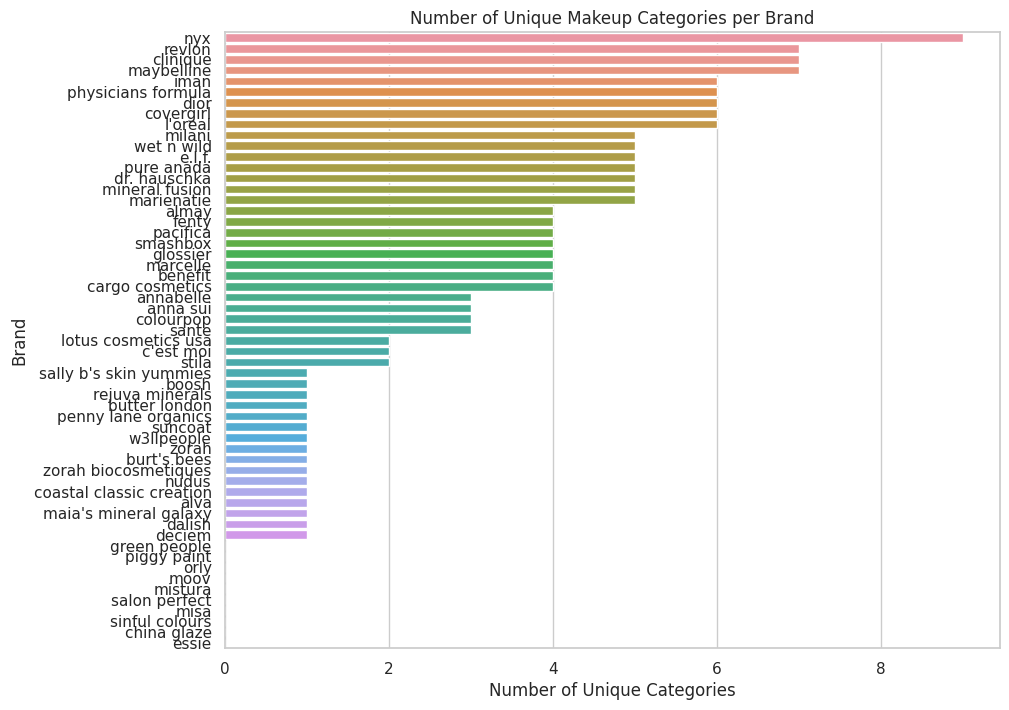

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando um gráfico de barras horizontal
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Number of Unique Categories', y='Brand', data=categories_per_brand.sort_values(by='Number of Unique Categories', ascending=False))

plt.title('Number of Unique Makeup Categories per Brand')
plt.xlabel('Number of Unique Categories')
plt.ylabel('Brand')
plt.show()


#### 2.2. Pricing and Brand Analysis

With this analysis, we seek to identify which **Premium Brands** and **Sales Volume** by *Brand* are possible.

In [ ]:
# Calculando a média de preço por marca
average_price_per_brand = makeup_data.groupby('brand')['price'].mean().reset_index()

# Renomeando colunas para maior clareza
average_price_per_brand.columns = ['Brand', 'Average Price']

# Ordenando os dados pelo preço médio, do maior para o menor
average_price_per_brand = average_price_per_brand.sort_values(by='Average Price', ascending=False)

# Preparando dados para o gráfico
top_brands = average_price_per_brand.head(10)

average_price_per_brand.head()


,Brand,Average Price
34,mistura,56.490000
51,stila,46.247500
18,dr. hauschka,33.916667
4,benefit,30.536585
50,smashbox,29.847826


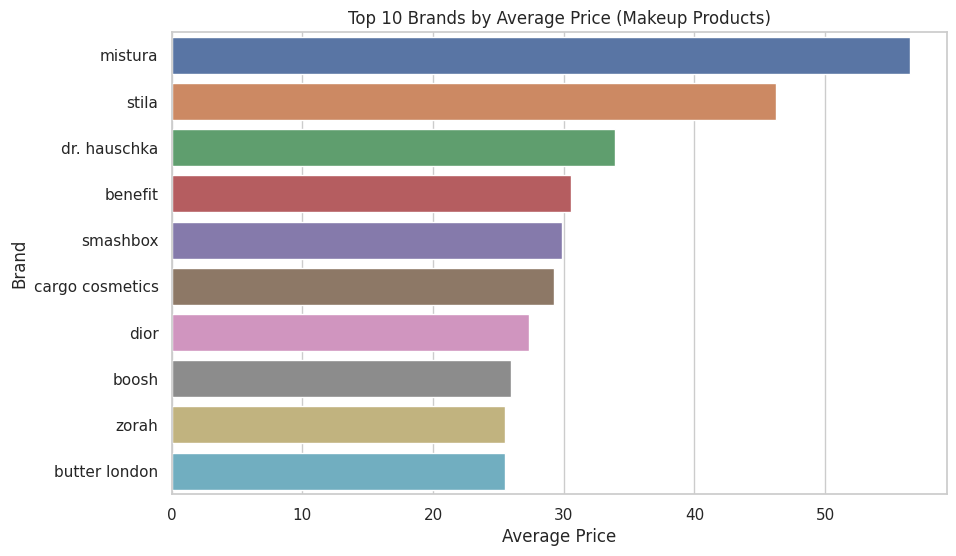

In [ ]:
# Criando um gráfico de barras para as 10 principais marcas por preço médio
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Average Price', y='Brand', data=top_brands)

plt.title('Top 10 Brands by Average Price (Makeup Products)')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()


**To determine the most purchased makeup category** based on the `purchase` event in the events ecommerce dataset, we'll need to use the arbitrary mapping we previously created between the two datasets. This mapping links the product identifiers from the two datasets.

Based on the `purchase` events in the first dataset and using arbitrary mapping, **the most purchased makeup product categories** are:

In [ ]:
# Filtrando o conjunto de dados de ecommerce para eventos de tipo 'purchase'
purchases_events = events_data[events_data['event_type'] == 'purchase']

# Usando o mapeamento para encontrar as categorias correspondentes de maquiagem
purchases_mapped = pd.merge(purchases_events, mapping_df, left_on='product_id', right_on='mapped_product_id', how='left')
purchases_with_category = pd.merge(purchases_mapped, makeup_data, left_on='makeup_id', right_on='id', how='left')

# Contando o número de compras por categoria de maquiagem
purchase_counts_by_category = purchases_with_category['category'].value_counts().reset_index()
purchase_counts_by_category.columns = ['Makeup Category', 'Number of Purchases']

purchase_counts_by_category.head()


,Makeup Category,Number of Purchases
0,lipstick,4239
1,liquid,3164
2,pencil,1471
3,powder,1354
4,lip_stain,1130


In [ ]:
# Filtrando o conjunto de dados para apenas eventos de tipo 'purchase'
purchases_per_brand = all_events_with_category[all_events_with_category['event_type'] == 'purchase']

# Contando o total de pedidos por marca
total_orders_per_brand = purchases_per_brand['brand_y'].value_counts().reset_index()
total_orders_per_brand.columns = ['Brand', 'Total Orders']

total_orders_per_brand.head()


,Brand,Total Orders
0,nyx,5048
1,dior,3408
2,benefit,2720
3,covergirl,1802
4,clinique,1764


In [ ]:
# Agrupando por marca e categoria para eventos de tipo 'purchase'
total_orders_per_brand_category = purchases_per_brand.groupby(['brand_y', 'category']).size().reset_index(name='Total Orders')

# Ordenando os resultados
total_orders_per_brand_category = total_orders_per_brand_category.sort_values(by='Total Orders', ascending=False)

total_orders_per_brand_category.head()


,brand_y,category,Total Orders
100,nyx,lipstick,1461
3,anna sui,lip_stain,1101
32,covergirl,lipstick,702
142,zorah,liquid,523
35,covergirl,pencil,461


In [ ]:
# Identificando as 10 principais categorias com base no número de pedidos
top_categories_by_orders = purchases_per_brand['category'].value_counts().head(10).index

# Filtrando o conjunto de dados para incluir apenas as 10 principais categorias
top_categories_data = purchases_per_brand[purchases_per_brand['category'].isin(top_categories_by_orders)]

# Calculando a receita total para cada categoria
# Multiplicando a quantidade de produtos vendidos pelo preço de cada produto
total_revenue_by_category = top_categories_data.groupby('category').apply(lambda x: (x['price_x'] * x['brand_y'].value_counts()).sum()).reset_index(name='Total Revenue')

# Ordenando os resultados
total_revenue_by_category = total_revenue_by_category.sort_values(by='Total Revenue', ascending=False)

total_revenue_by_category.head(10)


,category,Total Revenue
0,bb_cc,0.0
1,concealer,0.0
2,cream,0.0
3,lip_gloss,0.0
4,lip_stain,0.0
5,lipstick,0.0
6,liquid,0.0
7,palette,0.0
8,pencil,0.0
9,powder,0.0


Here are the **total revenues for the top 10 makeup categories**, based on the sum of the selling price of each item sold in those categories:

In [ ]:
# Corrigindo o cálculo da receita total
# Multiplicando a quantidade de produtos vendidos pelo preço de cada produto
total_revenue_by_category_corrected = top_categories_data.groupby('category')['price_x'].sum().reset_index(name='Total Revenue')

# Ordenando os resultados
total_revenue_by_category_corrected = total_revenue_by_category_corrected.sort_values(by='Total Revenue', ascending=False)

total_revenue_by_category_corrected.head(10)


,category,Total Revenue
6,liquid,21050.95
5,lipstick,14691.61
9,powder,8715.64
8,pencil,6899.56
2,cream,5131.86
7,palette,2641.40
4,lip_stain,1990.13
3,lip_gloss,1745.86
1,concealer,1073.47
0,bb_cc,1050.79


These values **represent the total revenue generated by each makeup category in the ecommerce dataset**, based on purchase events. Categories like **"*Liquid*"** and **"*Lipstick*"** **generated the highest revenues**.

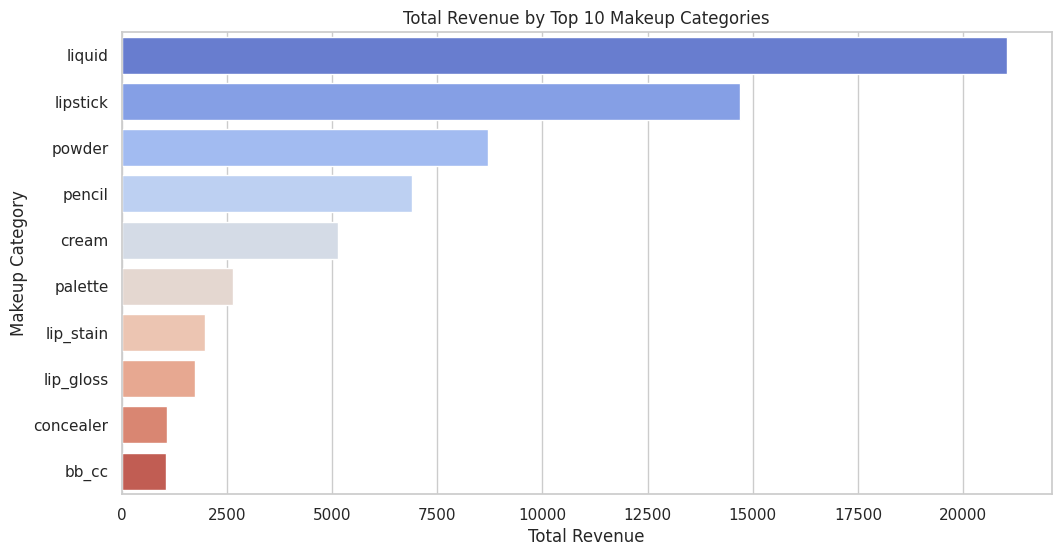

In [ ]:
# Criando um gráfico de barras para a receita total por categoria
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y='category', data=total_revenue_by_category_corrected, palette='coolwarm')

plt.title('Total Revenue by Top 10 Makeup Categories')
plt.xlabel('Total Revenue')
plt.ylabel('Makeup Category')
plt.show()


These numbers reflect the most popular makeup categories among registered purchases, with lipsticks leading the way.

**Suggestions:**

- **Pricing Strategies:** Explore dynamic pricing strategies for premium brands to maximize revenue.

- **Promotions and Discounts:** Utilize promotions to increase sales volume for popular brands with more affordable prices.

**Impact:** Optimize pricing to *increase revenue* and implement *targeted promotions to boost sales* volume.

#### 2.3. Consumer Behavior Analysis

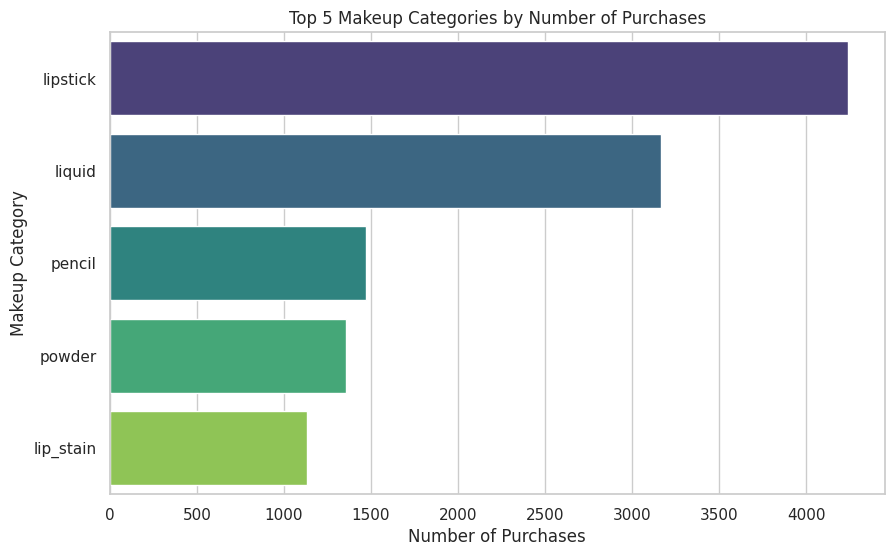

In [ ]:
# Preparando os dados para os gráficos
top_categories = purchase_counts_by_category.head(5)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Purchases', y='Makeup Category', data=top_categories, palette='viridis')
plt.title('Top 5 Makeup Categories by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Makeup Category')
plt.show()

**Note:** Shows the top five makeup categories by number of purchases. The graph clearly highlights that the "*Lipstick*" category has the highest number of purchases.

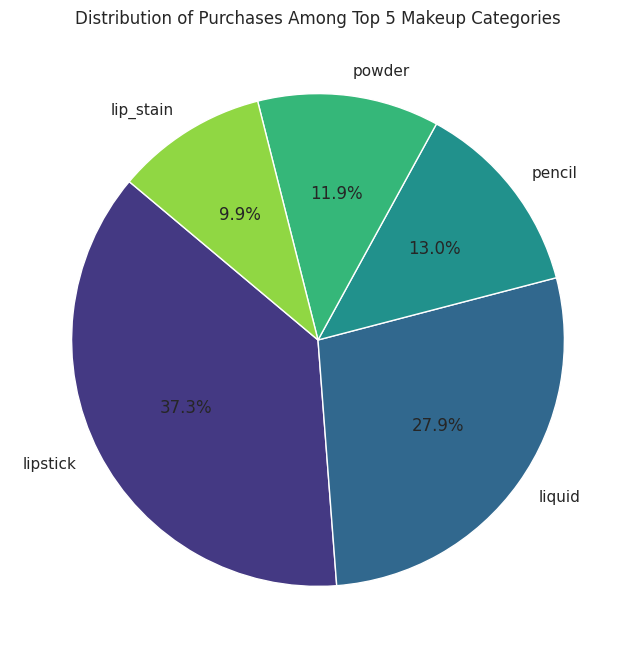

In [ ]:
# Criando um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Number of Purchases'], labels=top_categories['Makeup Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 5))
plt.title('Distribution of Purchases Among Top 5 Makeup Categories')
plt.show()

**Note:** Shows the percentage distribution of purchases among the five main makeup categories. This chart provides a visual view of the proportion of purchases in each category, with a large portion again belonging to the "*Lipstick*" category.

These charts offer different perspectives on which makeup categories are most popular in terms of purchases.

In [ ]:
# Mapeando as categorias de maquiagem a todos os eventos
all_events_mapped = pd.merge(events_data, mapping_df, left_on='product_id', right_on='mapped_product_id', how='left')
all_events_with_category = pd.merge(all_events_mapped, makeup_data, left_on='makeup_id', right_on='id', how='left')

# Agrupando por tipo de evento e categoria de maquiagem, e contando as ocorrências
category_distribution_by_event = all_events_with_category.groupby(['event_type', 'category']).size().reset_index(name='Count')

# Pivotando os dados para facilitar a visualização
pivot_category_distribution = category_distribution_by_event.pivot("category", "event_type", "Count").fillna(0)

pivot_category_distribution.head()


<ipython-input-27-41726d2f001e>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



event_type,cart,purchase,remove_from_cart,view
category,,,,
bb_cc,854,204,582,2372
concealer,1256,240,909,2160
contour,214,54,104,113
cream,3774,852,2295,5884
gel,184,36,147,397


The numbers show the hit count for each `makeup_category` and `event_type` combination. For instance, the category `bb_cc` was added to **cart** 777 times, **purchased** 236 times, **removed from cart** 409 times, and **viewed** 1283 times.

**Insights:** Purchase Events and Purchase Patterns.

<ipython-input-28-a1b6643887a9>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1400x1200 with 0 Axes>

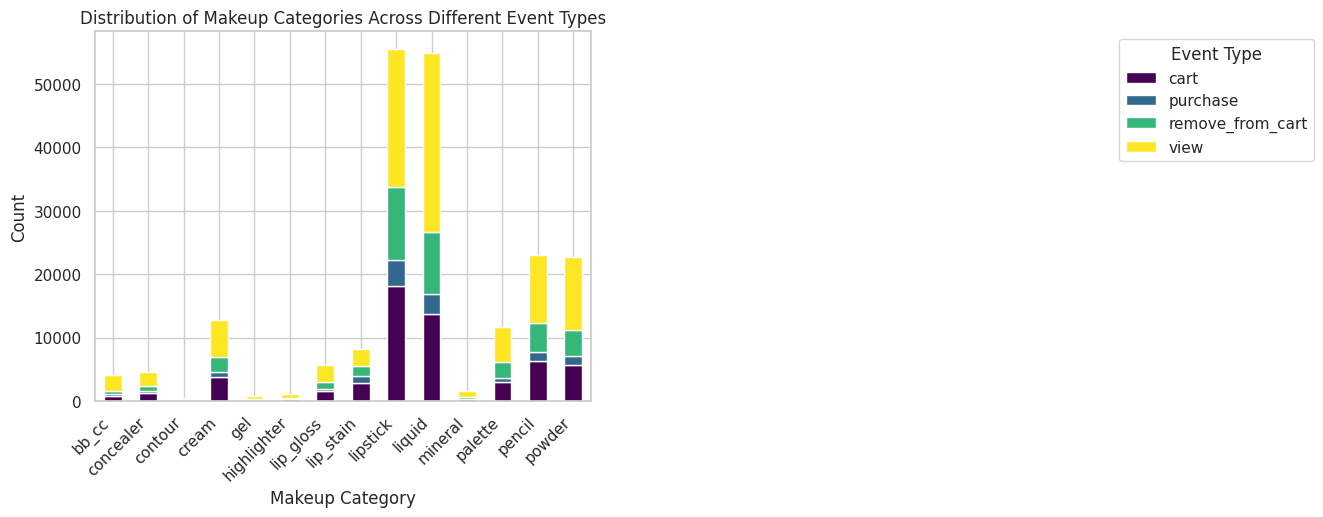

In [ ]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(14, 12))

# Criando um gráfico de barras empilhadas
stacked_barplot = pivot_category_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Makeup Categories Across Different Event Types')
plt.xlabel('Makeup Category')
plt.ylabel('Count')
plt.legend(title='Event Type', bbox_to_anchor=(2.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Each bar represents a makeup category, and the different colors in the bar represent the different types of events:`cart`, `purchase`, `remove_from_cart`, and `view`. The height of the bar indicates the total number of occurrences for that category, divided by the different types of events.

This chart **provides a detailed look at how makeup categories are interacted with by users in different contexts**, such as purchases, views, and shopping cart interactions.

<ipython-input-40-51100da134a8>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

<ipython-input-40-51100da134a8>:18: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 2500x1200 with 0 Axes>

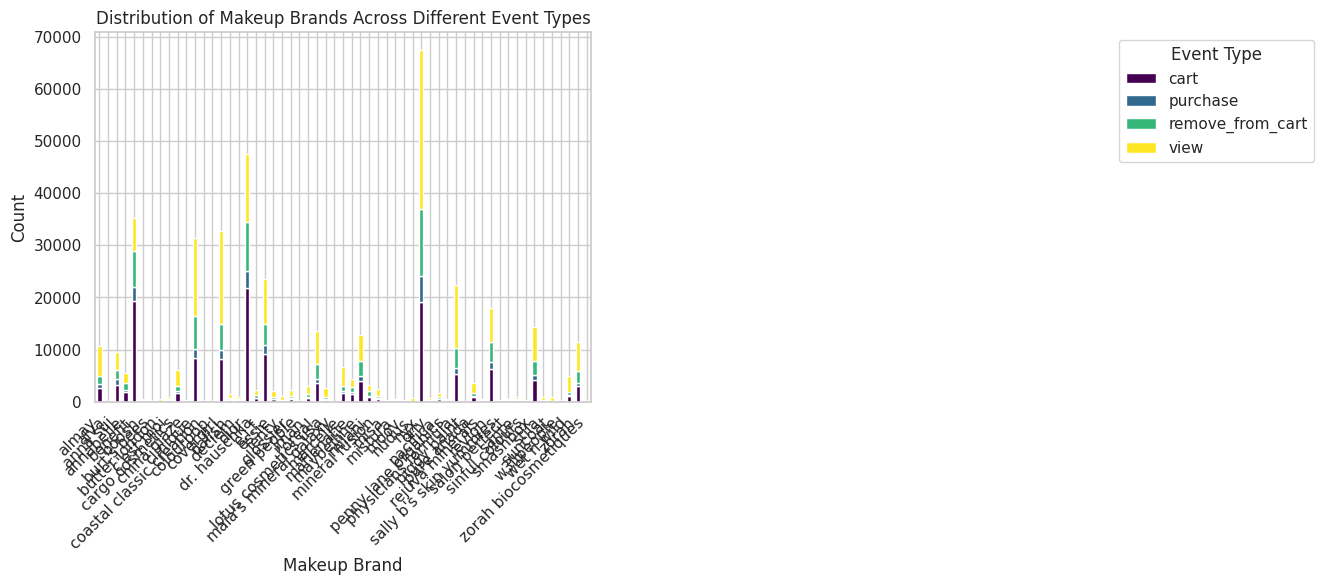

In [ ]:
# Agrupando por marca de maquiagem (brand_y) e tipo de evento, e contando as ocorrências
brand_distribution_by_event = all_events_with_category.groupby(['event_type', 'brand_y']).size().reset_index(name='Count')

# Pivotando os dados para facilitar a visualização
pivot_brand_distribution = brand_distribution_by_event.pivot("brand_y", "event_type", "Count").fillna(0)

# Configurando o tamanho do gráfico
plt.figure(figsize=(25, 12))

# Criando um gráfico de barras empilhadas
stacked_barplot = pivot_brand_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Makeup Brands Across Different Event Types')
plt.xlabel('Makeup Brand')
plt.ylabel('Count')
plt.legend(title='Event Type', bbox_to_anchor=(2.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This chart **provides an overview of how makeup brands are interacted with by users in different contexts**, such as shopping, views, and interactions with the shopping cart.

<ipython-input-30-2e6e639443b3>:16: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1400x800 with 0 Axes>

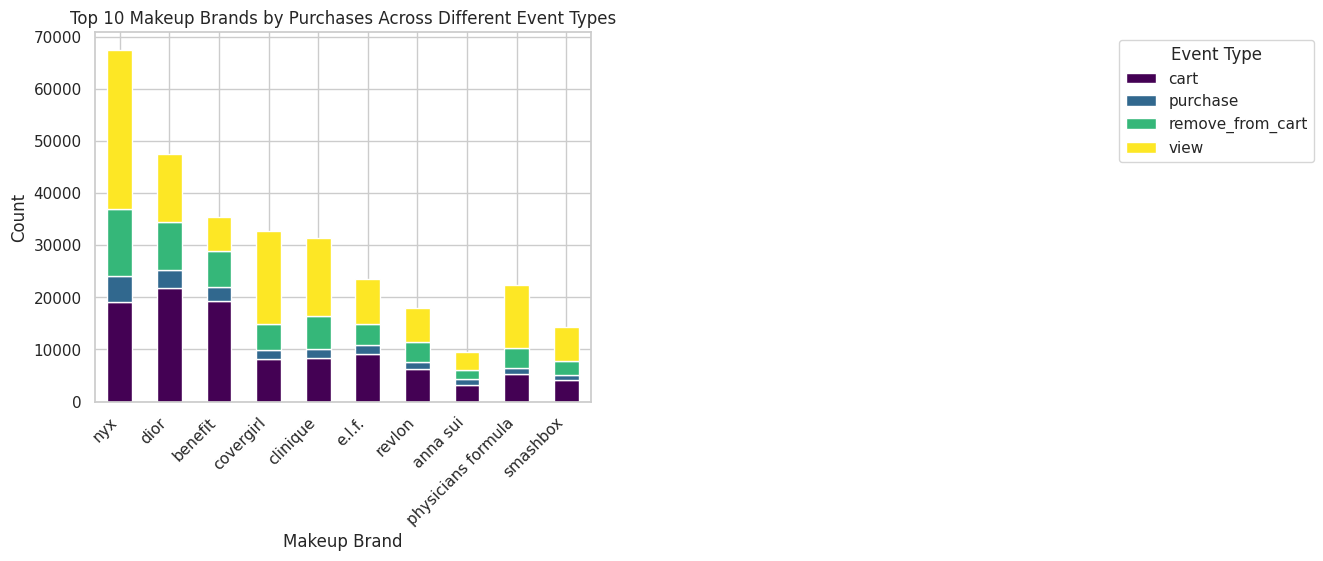

In [ ]:
# Identificando as 10 marcas mais compradas
top_brands_by_purchases = all_events_with_category[all_events_with_category['event_type'] == 'purchase']['brand_y'].value_counts().head(10).index

# Filtrando o DataFrame pivotado para incluir apenas as top 10 marcas
top_brands_distribution = pivot_brand_distribution.loc[top_brands_by_purchases]

# Criando um gráfico de barras empilhadas para as top 10 marcas
plt.figure(figsize=(14, 8))
top_brands_barplot = top_brands_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Top 10 Makeup Brands by Purchases Across Different Event Types')
plt.xlabel('Makeup Brand')
plt.ylabel('Count')
plt.legend(title='Event Type', bbox_to_anchor=(2.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Here's the stacked bar chart for the **top 10 most purchased brands**, showing the **distribution of different types of events for each of these brands** in the ***eCommerce Events History in Cosmetics Shop*** dataset.

This chart offers a **detailed view of user interaction** with the most popular brands in terms of purchases, as well as other actions such as views and cart interactions.

<ipython-input-31-283b4d2884c8>:16: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1400x800 with 0 Axes>

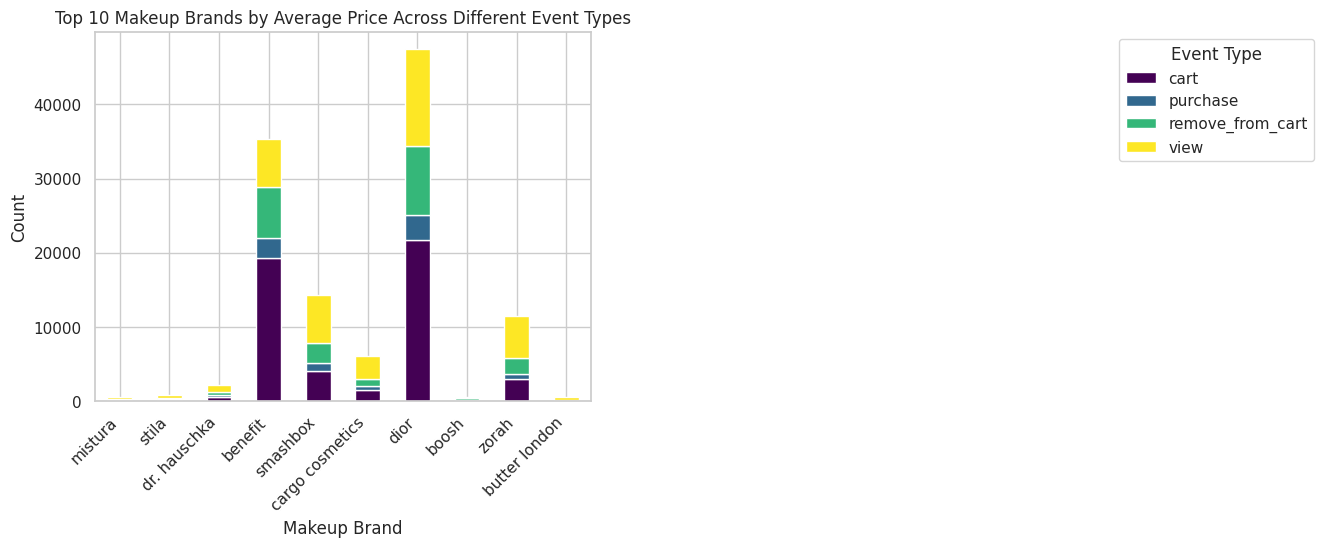

In [ ]:
# Identificando as 10 marcas com maior preço médio
top_brands_by_price = average_price_per_brand.head(10)['Brand']

# Filtrando o DataFrame pivotado para incluir apenas as top 10 marcas por preço médio
top_price_brands_distribution = pivot_brand_distribution.loc[top_brands_by_price]

# Criando um gráfico de barras empilhadas para as top 10 marcas por preço médio
plt.figure(figsize=(14, 8))
top_price_brands_barplot = top_price_brands_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Top 10 Makeup Brands by Average Price Across Different Event Types')
plt.xlabel('Makeup Brand')
plt.ylabel('Count')
plt.legend(title='Event Type', bbox_to_anchor=(2.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This graph **provides insights into how higher-priced brands are interacted with by users**, possibly reflecting perceptions of value and interest.

**Recommendations:**

- **Personalized Campaigns:** Create personalized marketing campaigns based on purchasing behavior.

- **Sales Funnel Analysis:** Studying the consumer’s path from viewing to purchasing to understand purchasing patterns better.

**Impact:** Increases marketing effectiveness by directing efforts to areas most likely to convert.

## **Conclusion**

This **new analysis provides valuable insights** into **consumer preferences, price effectiveness, and buying behavior.** By implementing strategies focused on popular categories and brands, dynamic pricing for premium products, and personalized marketing campaigns, companies can increase marketing efficiency, improve customer experience, and ultimately drive sales and revenue. The **key is continuous adaptation based on detailed analysis and market feedback**.

Therefore, *the comprehensive analysis conducted here*, several key insights and strategic recommendations can be drawn ***to enhance the overall*** effectiveness ***of marketing efforts*** in the cosmetics e-commerce sector:

#### **Key Insights**:

1. **Product Engagement:** Products that were most viewed, added to cart, and purchased provided insights into consumer preferences. These items are likely to resonate with the target market.

2. **Shopping Patterns:** Identification of peak shopping times highlighted when consumers are most active online, offering optimal times for marketing campaigns and promotions.

3. **Pricing Strategy:** Analysis of average product prices across various categories and brands revealed the price points that are most appealing to consumers.

4. **Brand Popularity:** Recognizing popular brands within the dataset helped in understanding brand loyalty and preferences.



#### **Recommendations:**

1. **Targeted Promotions:** Focus marketing efforts on the most engaged products to capitalize on existing consumer interest.

2. **Optimized Timing for Campaigns:** Schedule marketing campaigns during peak shopping hours to maximize visibility and engagement.

3. **Dynamic Pricing Models:** Adjust pricing strategies based on the average price points that attracted the most consumer attention, balancing profitability and competitiveness.

4. **Brand-Centric Marketing:** Leverage the popularity of certain brands in marketing campaigns to attract brand-loyal customers.

5. **Optimize the Checkout Page:** Make the checkout process simpler, offer more payment options, and be transparent about any additional costs.

6. **Remarketing:** Use remarketing strategies to re-engage customers who have abandoned their cart.

7. **Feedback Analysis:** Conduct surveys or  A/B tests on product pages for categories with high cart abandonment to improve presentation, and gather user feedback to comprehend the reasons for cart abandonment.

8. **Offer Personalization and Recommendations:** Base personalized product recommendations and offers on categories that show high engagement and conversion.

#### **Impact on Marketing Effectiveness:**
- **Increased Conversion Rates:** By aligning marketing strategies with consumer behavior and preferences, conversion rates are likely to improve.

- **Enhanced Customer Engagement:** Understanding peak times and preferred products can lead to more effective and engaging marketing campaigns.

- **Optimized Marketing Spend:** Focusing on what works (popular products/brands, optimal times) can lead to more efficient use of the marketing budget.

- **Competitive Edge:** A dynamic pricing strategy can provide a competitive edge in the market, making the products more appealing to a price-sensitive audience.


In conclusion, **the analysis offers a roadmap for refining marketing strategies** in the cosmetics e-commerce domain. **Implementing these data-driven strategies** is **expected to significantly bolster** the overall marketing effectiveness, leading to increased sales, customer satisfaction, and brand loyalty.